# Vizualization:
    - bar plots
    - scatter plots
    - counter the most common scaffold

## Important libraries

In [41]:
from scipy.spatial import distance
from sklearn import manifold
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import jaccard_score
from matplotlib.colors import ListedColormap

import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

from scripts import visualization
import importlib as imp
imp.reload(visualization)

<module 'scripts.visualization' from '/home/filv/PhD/phd_projects/IGA_2023_try_metrics_for_other_generators_v2/scripts/visualization.py'>

# Bar plots

In [9]:
def the_most_common_scaffold(viz,path_to_file, path_to_save, name):
    dff = pd.read_csv(path_to_file)
    dff = dff.sort_values(by=['count_of_occurance'], ascending=False)[['unique_scaffold_recall','count_of_occurance']][:2]
    mols=[Chem.MolFromSmiles(x) for x in dff['unique_scaffold_recall']]
    count=[str(x) for x in dff['count_of_occurance']]
    d=Draw.MolsToGridImage(mols,legends=count,molsPerRow=2, subImgSize=(250, 250), returnPNG=False)
    d.save(f"{path_to_save}{name}")

In [10]:
def bar_plots(viz,number,df,column_1, column_2, save, number_save, mean, colors=0):
    if mean == True:
        xticks = [x for x in range(number)]
    else:
        xticks = [x for x in range(number+1)]
    if colors != 0:
        df[[column_1,column_2]].plot(kind = 'bar',figsize = (6, 6), color = colors)
    else:
        df[[column_1,column_2]].plot(kind = 'bar',figsize = (6, 6))
    plt.xticks(xticks,list(df['name']))
    plt.title(f'Bar plot of metrics {column_1} and {column_2} using {viz.scaffold_type} scaffolds single scale')
    #plt.ylim([0.0,1])
    #plt.yticks(np.arange(0,1,0.1))
    if save==True:
        if mean == True:
            plt.savefig(f'img/plots/{viz.receptor_name}/{viz.type_cluster}/{viz.scaffold_type}_scaffolds/compare/metrics_compare_{column_1}_to_{column_2}.png', bbox_inches='tight')
        else:
            plt.savefig(f'img/plots/{viz.receptor_name}/{viz.type_cluster}/{viz.scaffold_type}_scaffolds/{viz.generator_name}/metrics_compare_{column_1}_to_{column_2}.png', bbox_inches='tight')
    plt.close()

In [11]:
def bar_plots_dual(viz,number,df,column_1, column_2, save, number_save, mean, colors=0):
    if mean == True:
        xticks = [x for x in range(number)]
    else:
        xticks = [x for x in range(number+1)]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax2 = ax.twinx()
    width = 0.4
    if colors != 0:
        df[column_1].plot(kind='bar', color=colors[0], figsize = (6, 6), ax=ax, width=width, position=1)
        df[column_2].plot(kind='bar', color=colors[1], figsize = (6, 6), ax=ax2, width=width, position=0)

    else:
        df[column_1].plot(kind='bar', color='red', figsize = (6, 6), ax=ax, width=width, position=1)
        df[column_2].plot(kind='bar', color='blue', figsize = (6, 6), ax=ax2, width=width, position=0)

    ax.set_ylabel(f'{column_1}')
    ax2.set_ylabel(f'{column_2}')
    ax.set_xticklabels(list(df['name']))
    
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    
    plt.title(f'Bar plot of metrics {column_1} and {column_2} using {viz.scaffold_type} scaffolds doble scale')
    if save==True:
        if mean == True:
            plt.savefig(f'img/plots/{viz.receptor_name}/{viz.type_cluster}/{viz.scaffold_type}_scaffolds/compare/metrics_compare_dual_{column_1}_to_{column_2}.png', bbox_inches='tight')
        else:
            plt.savefig(f'img/plots/{viz.receptor_name}/{viz.type_cluster}/{viz.scaffold_type}_scaffolds/{viz.generator_name}/metrics_compare_dual_{column_1}_to_{column_2}.png', bbox_inches='tight')
    plt.close()

In [12]:
def scatter_plot(viz,number,df,column_1, column_2, save):

    c_array = [x for x in range(number)]
    color_array = ['black', 'green', 'pink','blue', 'gray' ]


    df_scat = df.sort_values(by=[column_1], ascending=True)

    fig = plt.figure(figsize = (6, 6))
    ax = fig.add_subplot(111)
    d = ListedColormap(color_array[:number])
    
    scatterr = ax.scatter(df_scat[column_1], df_scat[column_2], c=c_array, cmap = d)
    list_name = df_scat.name.tolist()

    plt.title(f'Scatter plot of metrics {column_1} and {column_2} using {viz.scaffold_type}')
    plt.legend(handles=scatterr.legend_elements()[0], labels=list_name)
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    if save==True:
        plt.savefig(f'img/plots/{viz.receptor_name}/{viz.type_cluster}/{viz.scaffold_type}_scaffolds/{viz.generator_name}/scatter_plot_metrics_compare_{column_1}_to_{column_2}.png', bbox_inches='tight')
    plt.close()

In [13]:
def vizualization_of_one_calculation_1(number, type_cluster, generator, scaffold_type, receptor, save_option):

    path = f"data/results/{receptor}/{scaffold_type}_scaffolds/{type_cluster}/{generator}/"
    viz = visualization.Visualization(type_cluster, scaffold_type, generator, receptor, save_option)
    viz.control_folder_existing()


    df = pd.read_csv(f"{path}/df_all_clusters_with_mean.csv")
    display(df)
    df_without_mean = df.loc[:4]
    display(df_without_mean)

    #bar plot
    bar_plots(viz,number, df, 'TUPOR', 'SESY', save_option, 1, False, ['#ff6666', '#4d79ff'])
    bar_plots(viz,number, df, 'SESY','ASER', save_option, 2, False, ['#FF5733','black'])
    bar_plots(viz,number, df, 'uniq_scaffolds','tRS', save_option, 3, False, ['#0b84a5','#ca472f'])
    bar_plots(viz,number, df, 'TUPOR','ASER', save_option, 4, False, ['#6f4e7c', '#9dd866'])
    print("Created bar plots")

    #bar plot dual
    bar_plots_dual(viz,number, df, 'TUPOR', 'SESY', save_option, 1, False, ['#ff6666', '#4d79ff'])
    bar_plots_dual(viz,number, df, 'SESY','ASER', save_option, 2, False, ['#FF5733','black'])
    bar_plots_dual(viz,number, df, 'uniq_scaffolds','tRS', save_option, 3, False, ['#0b84a5','#ca472f'])
    bar_plots_dual(viz,number, df, 'TUPOR','ASER', save_option, 4, False, ['#6f4e7c', '#9dd866'])
    print("Created bar dual plots")

    #scatter plots
    scatter_plot(viz,number,df_without_mean, 'TUPOR', 'SESY', save_option)
    scatter_plot(viz,number,df_without_mean, 'SESY', 'ASER', save_option)
    scatter_plot(viz,number,df_without_mean, 'uniq_scaffolds', 'tRS', save_option)
    scatter_plot(viz,number,df_without_mean, 'TUPOR', 'ASER', save_option)
    print("Created scatter plots")

    occur = {}
    for x in range(number):
        occur[f'occur_{x}'] = f'{path}count_of_occurance_cluster_{x}_{type_cluster}_{generator}.csv'
        path_to_save = f'img/the_most_common_scaffolds/{receptor}/{type_cluster}/{scaffold_type}_scaffolds/{generator}/'
        name = f'the_most_common_{x}.png'
        the_most_common_scaffold(viz,occur[f'occur_{x}'], path_to_save, name )

In [34]:
number = 5 #options 1-5, depends how many calculation done
generator = 'Molpher' #options: 'Molpher'|'DrugEx'
scaffold_type = 'csk' #options: 'csk'|'murcko'
type_cluster = 'dis' #options: 'dis'|'sim' 
receptor = 'Glucocorticoid_receptor' #options: 'Glucocorticoid_receptor'|'Leukocyte_elastase'
vizualization_of_one_calculation_1(number, type_cluster, generator, scaffold_type, receptor, True)

Control folder existing


,name,type_cluster,scaffold,uniq_scaffolds,set_size,TUPOR_,TUPOR,SESY,ASER,tRS
0,Molpher_0,dis,csk,135545.0,1187859.0,16/42,0.380952,0.114109,0.003387,4023.0
1,Molpher_1,dis,csk,132077.0,1211203.0,18/36,0.500000,0.109046,0.001329,1610.0
2,Molpher_2,dis,csk,137303.0,1178785.0,12/42,0.285714,0.116478,0.000233,275.0
3,Molpher_3,dis,csk,116723.0,891650.0,23/40,0.575000,0.130907,0.007706,6871.0
4,Molpher_4,dis,csk,106618.0,707678.0,38/46,0.826087,0.150659,0.010718,7585.0
5,Molpher_mean,dis,csk,125653.2,1035435.0,-,0.513551,0.124240,0.004675,4072.8


,name,type_cluster,scaffold,uniq_scaffolds,set_size,TUPOR_,TUPOR,SESY,ASER,tRS
0,Molpher_0,dis,csk,135545.0,1187859.0,16/42,0.380952,0.114109,0.003387,4023.0
1,Molpher_1,dis,csk,132077.0,1211203.0,18/36,0.500000,0.109046,0.001329,1610.0
2,Molpher_2,dis,csk,137303.0,1178785.0,12/42,0.285714,0.116478,0.000233,275.0
3,Molpher_3,dis,csk,116723.0,891650.0,23/40,0.575000,0.130907,0.007706,6871.0
4,Molpher_4,dis,csk,106618.0,707678.0,38/46,0.826087,0.150659,0.010718,7585.0


Created bar plots
Created bar dual plots
Created scatter plots


# Result comparising Mean

In [49]:
def vizualization_of_one_calculation_mean(number,receptor_name, scaffold_type, type_cluster,\
                                          generators_name_list, save_option):

    viz = visualization.Visualization_mean(type_cluster, scaffold_type, generators_name_list, \
                                           receptor_name, save_option)
    viz.control_folder_existing()

    path = f"data/results/{receptor}/{scaffold_type}_scaffolds/{type_cluster}/"
    df = pd.read_csv(f"{path}mean_{scaffold_type}_{type_cluster}.csv")
    display(df)                        
                                

    #bar plot
    bar_plots(viz,number, df, 'TUPOR', 'SESY', save_option, 1, True, ['#ff6666', '#4d79ff'])
    bar_plots(viz,number, df, 'SESY','ASER', save_option, 2, True, ['#FF5733','black'])
    bar_plots(viz,number, df, 'uniq_scaffolds','tRS', save_option, 3, True, ['#0b84a5','#ca472f'])
    bar_plots(viz,number, df, 'TUPOR','ASER', save_option, 4, True, ['#6f4e7c', '#9dd866'])
    print("Created bar plots")

    #bar plot dual
    bar_plots_dual(viz,number, df, 'TUPOR', 'SESY', save_option, 1, True, ['#ff6666', '#4d79ff'])
    bar_plots_dual(viz,number, df, 'SESY','ASER', save_option, 2, True, ['#FF5733','black'])
    bar_plots_dual(viz,number, df, 'uniq_scaffolds','tRS', save_option, 3, True, ['#0b84a5','#ca472f'])
    bar_plots_dual(viz,number, df, 'TUPOR','ASER', save_option, 4, True, ['#6f4e7c', '#9dd866'])
    print("Created bar dual plots")


In [51]:
type_cluster = 'sim' #options: 'dis'|'sim' 
scaffold_type = 'murcko' #options: 'csk'|'murcko'
generators_name_list = ['Molpher', 'DrugEx'] #options: 'Molpher'|'DrugEx'
receptor = 'Glucocorticoid_receptor' #options: 'Glucocorticoid_receptor'|'Leukocyte_elastase'


vizualization_of_one_calculation_mean(2, receptor, scaffold_type, type_cluster, generators_name_list, True)

Control folder existing


,name,type_cluster,scaffold,uniq_scaffolds,set_size,TUPOR_,TUPOR,SESY,ASER,tRS
0,Molpher_mean,sim,murcko,270497.0,1047959.0,-,0.295315,0.258171,0.003368,3542.2
1,DrugEx_mean,sim,murcko,718362.2,1000000.0,-,0.271650,0.718362,0.003605,3605.0


Created bar plots
Created bar dual plots


# Look for count occurance tabels

In [24]:
def nejcasteji_vyskytujici_scaffold(cesta_k_souboru, text):
    print(text)
    dff = pd.read_csv(cesta_k_souboru)
    dff = dff.sort_values(by=['count_of_occurance'], ascending=False)[['scaffold_test_tp','count_of_occurance']][:3]
    dff.insert(loc=1, column='image', value=0)
    PandasTools.AddMoleculeColumnToFrame(dff, 'scaffold_test_tp', 'image')
    display(dff)

In [12]:
def nejcasteji_vyskytujici_scaffold_in_whole_generated_set(number,path, text, type_cluster, generator):
    print(text)
    occur = {}
    result = pd.DataFrame(columns = ['scaffold','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4'])

    df = pd.DataFrame()
    for x in range(number):
        occur[f'occur_{x}'] = f'{path}scaffolds_of_generated_moleculs_cluster_{x}_{type_cluster}_{generator}.csv'
        dff = pd.read_csv(occur[f'occur_{x}'], header=None)
        dff.columns = ['scaffold']
        dff['count'] = int(1)
        #display(dff)
        #df = pd.concat([df, dff], ignore_index=True)

        
        if x==0:
            cluster_0 = dff.groupby(['scaffold'], as_index=False).sum().sort_values(by=['count'], ascending=False)
        elif x==1:
            cluster_1 = dff.groupby(['scaffold'], as_index=False).sum().sort_values(by=['count'], ascending=False)
        elif x==2:
            cluster_2 = dff.groupby(['scaffold'], as_index=False).sum().sort_values(by=['count'], ascending=False)
        elif x==3:
            cluster_3 = dff.groupby(['scaffold'], as_index=False).sum().sort_values(by=['count'], ascending=False)
        elif x==4:
            cluster_4 = dff.groupby(['scaffold'], as_index=False).sum().sort_values(by=['count'], ascending=False)

    uniq = list(set(cluster_0['scaffold']).intersection(set(cluster_1['scaffold']),set(cluster_2['scaffold']),set(cluster_3['scaffold']),set(cluster_4['scaffold'])))

    result['scaffold'] = uniq
    result['cluster_0'] = int(0)
    result['cluster_1'] = int(0)
    result['cluster_2'] = int(0)
    result['cluster_3'] = int(0)
    result['cluster_4'] = int(0)
    for x in range(len(uniq)):
        smile = uniq[x]

        count_0 = cluster_0[cluster_0['scaffold']==smile]['count']
        count_1 = cluster_1[cluster_1['scaffold']==smile]['count']
        count_2 = cluster_2[cluster_2['scaffold']==smile]['count']
        count_3 = cluster_3[cluster_3['scaffold']==smile]['count']
        count_4 = cluster_4[cluster_4['scaffold']==smile]['count']

        result.loc[x,'cluster_0'] = count_0.item()
        result.loc[x,'cluster_1'] = count_1.item()
        result.loc[x,'cluster_2'] = count_2.item()
        result.loc[x,'cluster_3'] = count_3.item()
        result.loc[x,'cluster_4'] = count_4.item()

    
    display(result.sort_values(by=['cluster_0'], ascending=False))
    display(result.sort_values(by=['cluster_1'], ascending=False))
    display(result.sort_values(by=['cluster_2'], ascending=False))
    display(result.sort_values(by=['cluster_3'], ascending=False))
    display(result.sort_values(by=['cluster_4'], ascending=False))

    result.to_csv("data/results/result_count_occurance_all-generated_clusters_dis_Molpher.csv", index=False)
    #        if dff[0][y] in set(result['scaffold']):
    #            print("IF")
    #            print("PRINT",result[result['scaffold'] == [dff[0][y]]])
    #            result[result['scaffold'] == [dff[0][y]]]['count'][0] += 1
    #            
    #        else:
    #            print("ELSE")
    #            result.loc[len(result)] = [dff[0][y],1]
    #            display(result)
#
    #print("KONEC")
    #print(result_dict)
    #dff.insert(loc=1, column='image', value=0)
    #PandasTools.AddMoleculeColumnToFrame(dff, 'scaffold_test_tp', 'image')
    #display(dff)


In [13]:
nejcasteji_vyskytujici_scaffold_in_whole_generated_set(5,"data/results/csk_scaffolds/dis/Molpher/", "Molpher generator Glucocorticoidni receptor dis", 'dis', "Molpher")

Molpher generator Glucocorticoidni receptor dis


,scaffold,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,13266,13028,10916,8522,2243
1873,C1CCCCC1,7111,6541,4365,6053,1536
1341,C1CCC(C2CCC3CCCCC32)CC1,6625,7788,6247,1882,2460
625,C1CCC(CCCCC2CCCCC2)CC1,6430,7123,6595,5655,676
6370,C1CCC(CCCCCC2CCCCC2)CC1,5868,6418,5684,4292,465
...,...,...,...,...,...,...
2141,C(CCCCCCCC1CCCC2CCCCC12)CCCCCCC1CCCCC1,1,3,5,17,2
2764,C1CCC(CCC2CCCCCC2C2CCC3C(CCC3C3CCCCC3)C2)CC1,1,57,1,1,2
6004,C1CCC(CC(C2CCCCC2)C2CCCC(CCC3CCCC3)C2)CC1,1,9,11,12,13
2755,C1CCC(C2C(CC3CCCC4CCCCC43)CC3CCCCC32)CC1,1,16,28,9,8


,scaffold,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,13266,13028,10916,8522,2243
1341,C1CCC(C2CCC3CCCCC32)CC1,6625,7788,6247,1882,2460
625,C1CCC(CCCCC2CCCCC2)CC1,6430,7123,6595,5655,676
3588,C1CCC(C2CCC3CCCCC3C2)CC1,5504,6694,5678,1454,3473
1873,C1CCCCC1,7111,6541,4365,6053,1536
...,...,...,...,...,...,...
6071,C(CCCC1CCCCC1)CCCC1CCC(CC2CCC2)C1,2,1,4,3,1
3470,C1CCC(C2CCC3CCC(C4CCCC4)C32)CC1,2,1,4,1,2
57,C1CCC(CCC2C(C3CCCCC3)CCC2C2CCCC2)CC1,16,1,27,1,4
4781,C1CCC(CC(CCCC2CCC(C3CCC4CCCCC43)CC2)C2CCCCC2)CC1,217,1,69,152,24


,scaffold,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,13266,13028,10916,8522,2243
625,C1CCC(CCCCC2CCCCC2)CC1,6430,7123,6595,5655,676
1341,C1CCC(C2CCC3CCCCC32)CC1,6625,7788,6247,1882,2460
6370,C1CCC(CCCCCC2CCCCC2)CC1,5868,6418,5684,4292,465
3588,C1CCC(C2CCC3CCCCC3C2)CC1,5504,6694,5678,1454,3473
...,...,...,...,...,...,...
6516,C1CCC(C2CCC(CC3CCC3C3CCCCC3)CC2)CC1,49,15,1,2,4
6240,C1CCC(CCCCC2CCC2C2CCCC3CCCCC32)CC1,15,11,1,10,5
828,C1CCC(CCC2CCC3C(CCC4CCC(C5CCC5)CCC43)C2)CC1,6,11,1,1,6
610,C1CCC(C2CCCCCC2CC2CCC3CCCCC32)CC1,20,7,1,14,7


,scaffold,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,13266,13028,10916,8522,2243
1873,C1CCCCC1,7111,6541,4365,6053,1536
625,C1CCC(CCCCC2CCCCC2)CC1,6430,7123,6595,5655,676
6370,C1CCC(CCCCCC2CCCCC2)CC1,5868,6418,5684,4292,465
6100,C1CCC(CCCC2CCC3CCC(C4CCCCC4)CC3C2)CC1,49,4927,3363,3151,2377
...,...,...,...,...,...,...
5475,C1CCCC(CCCC2CCC3C(CCC3C3CCCCC3)C2)CC1,15,4,10,1,6
3513,C1CCC(CCC2CCC(C3CCC(C4CCCC4)C3)CC2)CC1,6,25,5,1,9
5471,C1CCC(CCCCC2CCCC(CC3CCC4CCCC4C3)C2)CC1,8,8,6,1,5
3531,C1CCC2CC(C3CCCCC3C3CC4CCCCC43)CCC2C1,1,1,5,1,7


,scaffold,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
3588,C1CCC(C2CCC3CCCCC3C2)CC1,5504,6694,5678,1454,3473
2180,C1CCC(CCC2CCC3C(CCC3C3CCCCC3)C2)CC1,5708,4615,5519,1075,3109
6040,C1CCC(CCC(CC2CCC3CCCC3C2)C2CCCCC2)CC1,2216,31,2168,2300,2467
1341,C1CCC(C2CCC3CCCCC32)CC1,6625,7788,6247,1882,2460
6100,C1CCC(CCCC2CCC3CCC(C4CCCCC4)CC3C2)CC1,49,4927,3363,3151,2377
...,...,...,...,...,...,...
3137,C1CCC(CCCCC2CCCC(C3CCC(CCC4CCCC4)CC3)C2)CC1,3,1,10,6,1
1499,C1CCC2C(C1)CC1C3CCCC3CCC21,7,7,2,6,1
3134,C1CCC(CCC2CC2C2CCCC3CCCCC32)CC1,8,7,14,4,1
3124,C1CCC(CCC(C2CCCC2)C2CC2)CC1,19,9,8,3,1


In [11]:
df = pd.read_csv("data/results/result_count_occurance_all-generated_clusters_dis_Molpher.csv")
df

,scaffold,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,C1CCCC(C2CCCC(CCCCC3CCCCC3)C2)CCC1,126,110,83,62,34
1,C1CCC(CCCCC2CCC3C(CC4CCCCC4)CCCC3C2)CC1,11,8,22,21,15
2,C1CCC(CCCC2CCC3C(CCCCC4CCCCC43)C2)C1,5,4,17,4,1
3,C1CCC(C2CCCC(C3CCCC4CCCCC4CC3)C2)CC1,20,10,2,16,8
4,C1CCC(CC2CCCCC2CC2CC2)CC1,180,252,184,134,2
...,...,...,...,...,...,...
6835,C1CCC(CCC2CCCC(C3CCCCC3)C3CCCC3C2)CC1,2,3,1,3,3
6836,C1CCC(C(CCCC2CCCC2)CC2CCC(CC3CCCC3)CC2)CC1,2,1,1,3,1
6837,C1CCC(CCCCC2CCCCC2C2CCC3CCCCC3C2)CC1,58,39,43,4,24
6838,C1CCC(CC2CCC3C(CCCC3C3CCCCC3)C2)CC1,44,70,21,12,13


EXPORT


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
1873,C1CCCCC1,,7111,6541,4365,6053,1536
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
6370,C1CCC(CCCCCC2CCCCC2)CC1,,5868,6418,5684,4292,465

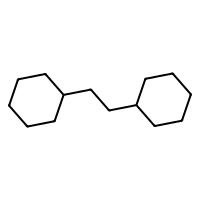
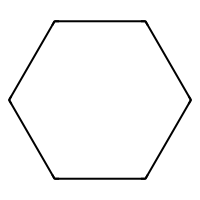
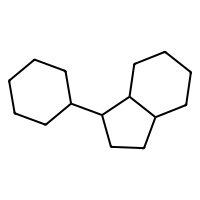
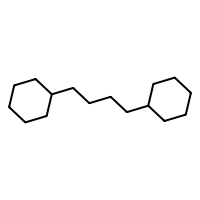
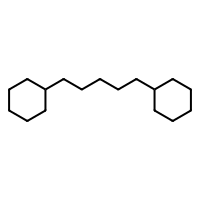

[1003/165442.475072:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1003/165442.525167:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[1003/165442.529167:ERROR:command_buffer_proxy_impl.cc(128)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.
66393 bytes written to file /home/filv/PhD/phd_projects/IGA_2023_try_metrics_for_other_generators/img/the_most_common_scaffolds/Glucocorticoid_receptor/dis/csk/Molpher/the_most_common_within_every_clusters_0.png


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
1873,C1CCCCC1,,7111,6541,4365,6053,1536
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
6370,C1CCC(CCCCCC2CCCCC2)CC1,,5868,6418,5684,4292,465

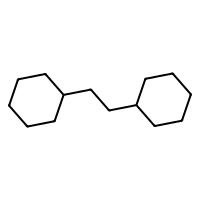
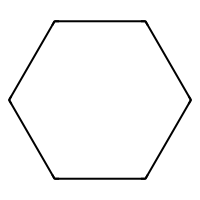
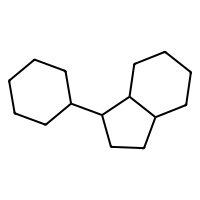
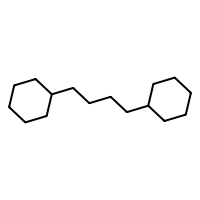
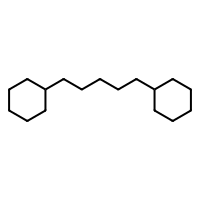

EXPORT


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
3588,C1CCC(C2CCC3CCCCC3C2)CC1,,5504,6694,5678,1454,3473
1873,C1CCCCC1,,7111,6541,4365,6053,1536

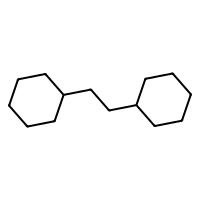
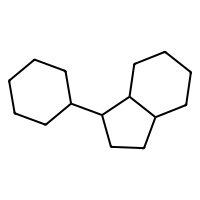
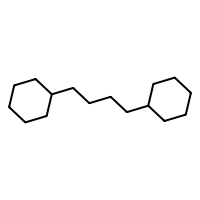
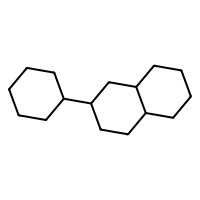
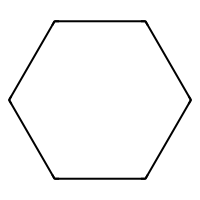

[1003/165442.772485:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1003/165442.834064:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[1003/165442.838204:ERROR:command_buffer_proxy_impl.cc(128)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.
69412 bytes written to file /home/filv/PhD/phd_projects/IGA_2023_try_metrics_for_other_generators/img/the_most_common_scaffolds/Glucocorticoid_receptor/dis/csk/Molpher/the_most_common_within_every_clusters_1.png


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
3588,C1CCC(C2CCC3CCCCC3C2)CC1,,5504,6694,5678,1454,3473
1873,C1CCCCC1,,7111,6541,4365,6053,1536

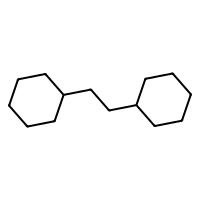
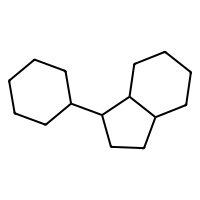
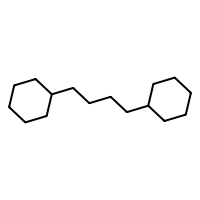
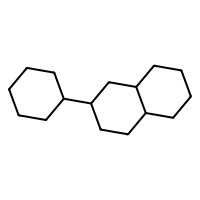
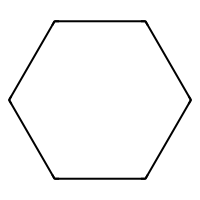

EXPORT


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
6370,C1CCC(CCCCCC2CCCCC2)CC1,,5868,6418,5684,4292,465
3588,C1CCC(C2CCC3CCCCC3C2)CC1,,5504,6694,5678,1454,3473

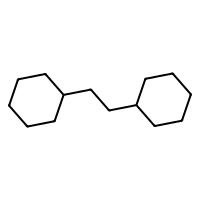
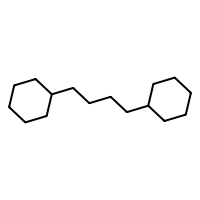
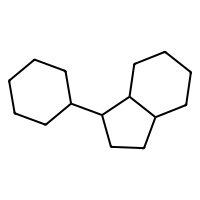
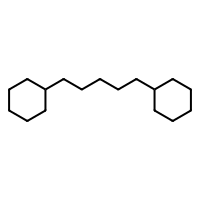
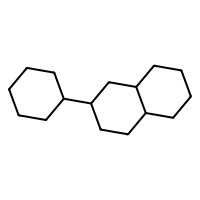

[1003/165443.060457:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1003/165443.125524:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[1003/165443.129144:ERROR:command_buffer_proxy_impl.cc(128)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.
67885 bytes written to file /home/filv/PhD/phd_projects/IGA_2023_try_metrics_for_other_generators/img/the_most_common_scaffolds/Glucocorticoid_receptor/dis/csk/Molpher/the_most_common_within_every_clusters_2.png


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
6370,C1CCC(CCCCCC2CCCCC2)CC1,,5868,6418,5684,4292,465
3588,C1CCC(C2CCC3CCCCC3C2)CC1,,5504,6694,5678,1454,3473

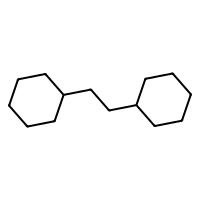
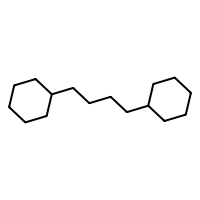
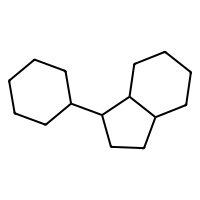
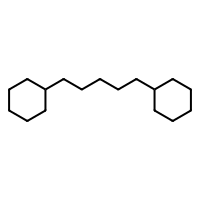
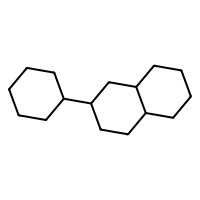

EXPORT


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
1873,C1CCCCC1,,7111,6541,4365,6053,1536
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
6370,C1CCC(CCCCCC2CCCCC2)CC1,,5868,6418,5684,4292,465
6100,C1CCC(CCCC2CCC3CCC(C4CCCCC4)CC3C2)CC1,,49,4927,3363,3151,2377

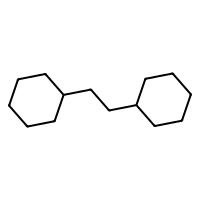
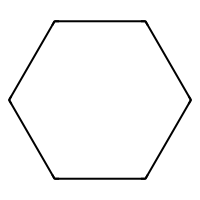
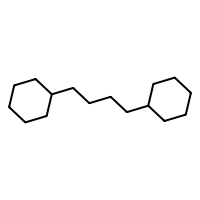
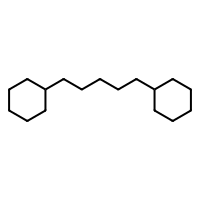
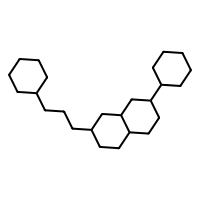

[1003/165443.465536:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1003/165443.579430:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[1003/165443.582695:ERROR:command_buffer_proxy_impl.cc(128)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.
65639 bytes written to file /home/filv/PhD/phd_projects/IGA_2023_try_metrics_for_other_generators/img/the_most_common_scaffolds/Glucocorticoid_receptor/dis/csk/Molpher/the_most_common_within_every_clusters_3.png


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
6664,C1CCC(CCC2CCCCC2)CC1,,13266,13028,10916,8522,2243
1873,C1CCCCC1,,7111,6541,4365,6053,1536
625,C1CCC(CCCCC2CCCCC2)CC1,,6430,7123,6595,5655,676
6370,C1CCC(CCCCCC2CCCCC2)CC1,,5868,6418,5684,4292,465
6100,C1CCC(CCCC2CCC3CCC(C4CCCCC4)CC3C2)CC1,,49,4927,3363,3151,2377

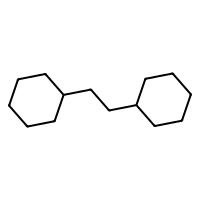
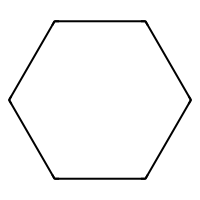
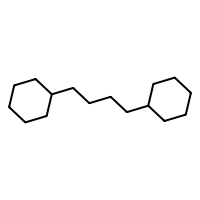
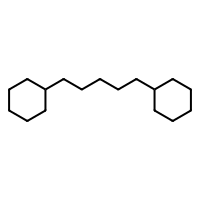
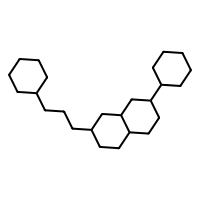

EXPORT


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
3588,C1CCC(C2CCC3CCCCC3C2)CC1,,5504,6694,5678,1454,3473
2180,C1CCC(CCC2CCC3C(CCC3C3CCCCC3)C2)CC1,,5708,4615,5519,1075,3109
6040,C1CCC(CCC(CC2CCC3CCCC3C2)C2CCCCC2)CC1,,2216,31,2168,2300,2467
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
6100,C1CCC(CCCC2CCC3CCC(C4CCCCC4)CC3C2)CC1,,49,4927,3363,3151,2377

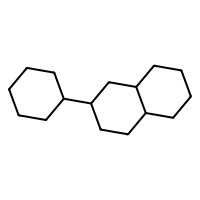
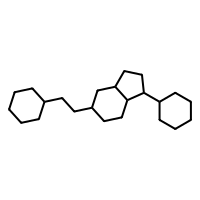
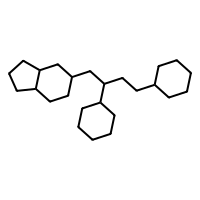
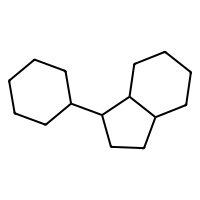
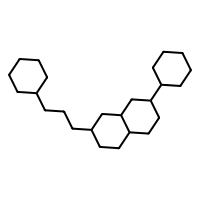

[1003/165443.816999:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1003/165443.865245:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[1003/165443.868969:ERROR:command_buffer_proxy_impl.cc(128)] ContextResult::kTransientFailure: Failed to send GpuControl.CreateCommandBuffer.
73715 bytes written to file /home/filv/PhD/phd_projects/IGA_2023_try_metrics_for_other_generators/img/the_most_common_scaffolds/Glucocorticoid_receptor/dis/csk/Molpher/the_most_common_within_every_clusters_4.png


,scaffold,image,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
3588,C1CCC(C2CCC3CCCCC3C2)CC1,,5504,6694,5678,1454,3473
2180,C1CCC(CCC2CCC3C(CCC3C3CCCCC3)C2)CC1,,5708,4615,5519,1075,3109
6040,C1CCC(CCC(CC2CCC3CCCC3C2)C2CCCCC2)CC1,,2216,31,2168,2300,2467
1341,C1CCC(C2CCC3CCCCC32)CC1,,6625,7788,6247,1882,2460
6100,C1CCC(CCCC2CCC3CCC(C4CCCCC4)CC3C2)CC1,,49,4927,3363,3151,2377

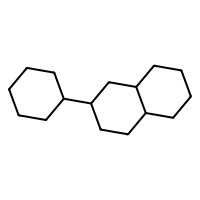
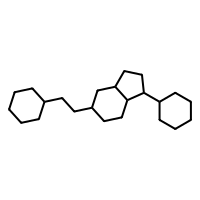
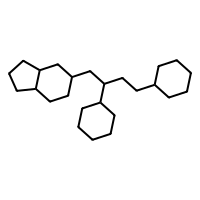
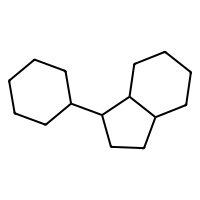
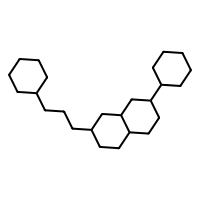

In [33]:
receptor = 'Glucocorticoid_receptor'
type_cluster = 'dis'
scaffold = 'csk'
generator = 'Molpher'
for x in range(5):
    df1 = df.sort_values(by=[f'cluster_{x}'], ascending=False)[:5]
    df1.insert(loc=1, column='image', value=0)
    PandasTools.AddMoleculeColumnToFrame(df1, 'scaffold', 'image')
    #df1 = df1.drop(['scaffold'], axis=1)
    path_to_save = f'img/the_most_common_scaffolds/{receptor}/{type_cluster}/{scaffold}/{generator}/'
    name = f'the_most_common_within_every_clusters_{x}.png'
    ExportReport(df1,path_to_save, name, 1000,1200)
    display(df1)
    

In [38]:
nejcasteji_vyskytujici_scaffold("data/results/csk_scaffolds/dis/Molpher/count_of_occurance_cluster_0_dis_Molpher.csv", "Molpher generator cluster 0 Glucocorticoidni receptor dis")

Molpher generator cluster 0 Glucocorticoidni receptor dis


NameError: name 'cesta_k_souboru' is not defined

Molpher generator cluster 1 Glucocorticoidni receptor dis


,scaffold_test_tp,image,count_of_occurance,uniq_occurance
19,C1CCC(CCC2CCC3C(CCC3C3CCCC(CCC4CCCC4)C3)C2)CC1,,566,1
2,C1CCC(CC(CC2CCCCC2)C2CCCCC2)CC1,,357,1
0,C1CCC(CCCCCC2CCC3C(CCC3C3CCCCC3)C2)CC1,,250,1

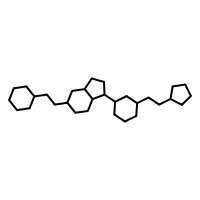
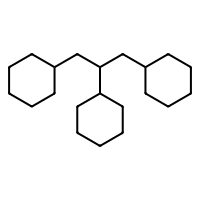
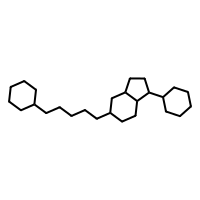

In [91]:
nejcasteji_vyskytujici_scaffold("data/results/csk_scaffolds/count_of_occurance_cluster_1_dis_Molpher.csv", "Molpher generator cluster 1 Glucocorticoidni receptor dis")

Molpher generator cluster 2 Glucocorticoidni receptor dis


,scaffold_test_tp,image,count_of_occurance,uniq_occurance
7,C1CCC(C2CC3CCCCC3C3CCCCC23)CC1,,202,1
31,C1CCC(CC2CC3CCCCC3C2C2CCCCC2)CC1,,20,1
27,C1CCC(CC2CCCC(C3CC4CCCCC4C4CCCCC34)C2)CC1,,19,1

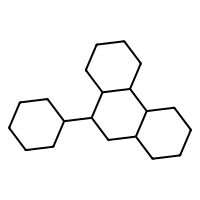
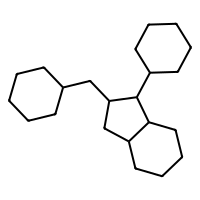
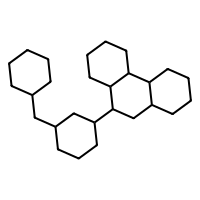

In [92]:
nejcasteji_vyskytujici_scaffold("data/results/csk_scaffolds/count_of_occurance_cluster_2_dis_Molpher.csv", "Molpher generator cluster 2 Glucocorticoidni receptor dis")

Molpher generator cluster 3 Glucocorticoidni receptor dis


,scaffold_test_tp,image,count_of_occurance,uniq_occurance
9,C1CCC(C2CCC3CCCCC32)CC1,,1882,1
1,C1CCC(C2CCC3CCCCC3C2)CC1,,1454,1
5,C1CCC(CCC2CCC3C(CCC3C3CCCCC3)C2)CC1,,1075,1

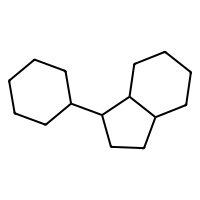
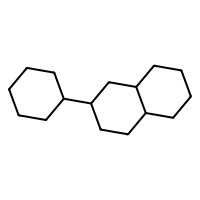
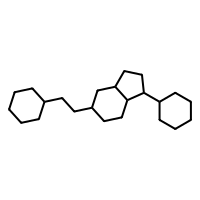

In [94]:
nejcasteji_vyskytujici_scaffold("data/results/csk_scaffolds/count_of_occurance_cluster_3_dis_Molpher.csv", "Molpher generator cluster 3 Glucocorticoidni receptor dis")

# Vizualization, PCA, t-SNE

In [143]:
from rdkit.Chem import DataStructs
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from pca import (pca, logistic_pca)
from matplotlib.legend_handler import HandlerBase

In [173]:
def all_generated_sets(number,path,text, type_cluster, generator):
    df = pd.DataFrame()
    occur = {}
    for x in range(number):
        occur[f'occur_{x}'] = f'{path}scaffolds_of_generated_moleculs_cluster_{x}_{type_cluster}_{generator}.csv'
        dff = pd.read_csv(occur[f'occur_{x}'], header=None)
        dff = dff.drop_duplicates(ignore_index=True)
        dff = dff.sample(n = 10000,random_state = 20)
        dff.columns = ['scaffold']
        dff['cluster'] = f"cluster_{x}"
        df = pd.concat([df, dff], ignore_index=True)
    a = []
    for x in range(len(df)):
        try:
            a.append(AllChem.GetMorganFingerprintAsBitVect\
                  (Chem.MolFromSmiles(df.loc[x]['scaffold']), 3, nBits = 2048))
        except:
            print("Faild to create scaffold_csk")
            print("Index",x)
            print(df.loc[x]['scaffold'])
            df =  df.drop(x)
    df['mfp'] = a
    display(df)
    return df, a

In [174]:
df, a = all_generated_sets(5,"data/results/csk_scaffolds/dis/Molpher/", "Molpher generator Glucocorticoidni receptor dis", 'dis', "Molpher")

,scaffold,cluster,mfp
0,C1CCC(CCC(CC2CCC(C3CCC(C4CCCC4)C3)CC2)C2CCCCC2...,cluster_0,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,C1CCC(CC2CCC(CC3CCC(CCC4CCCC5CCCCC5C4C4CCC4)CC...,cluster_0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,C1CCC(C2CCC(CC3CC4CCCCC4C(C4CCC4)C3)CC2)CC1,cluster_0,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
3,C1CCC(CCC2CCCC3CC(CCC4CCC4)CCC23)CC1,cluster_0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,C1CCC(C2CC3C(CCCCCC4CCC(C5CC5)CC4)CCCC23)CC1,cluster_0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
49995,C1CCC(CCCC2CCC(CCC3CCC(C4CCC(C5CC5)CC4)C3)CC2)CC1,cluster_4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
49996,C1CCC(CCCCCC2CCCC(C3CCC(CCCC4CCCCC4)CC3)C2)CC1,cluster_4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
49997,C1CCC(CCCC2CCCC(C3CCCC(CCC(CCC4CCCCC4)C4CCC4)C...,cluster_4,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
49998,C1CCC(C(CCCC2CCC(C3CCCCC3)C2)CC2CCC2)CC1,cluster_4,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [175]:
b = np.array(a)

In [176]:
c_array = b.astype('float64')  # from bool to float
len(c_array)

50000

In [177]:
dff = df[['cluster']]
dff_labels = dff.cluster.tolist()
len(dff_labels)

50000

In [180]:
# settings
n_components = 2   # PCA dimensionality
n_clusters = 5     # number of clusters to simulate
n_samples = 10000    # samples per cluster
n_dimensions = 16  

In [181]:
# set random seed
np.random.seed(0)

# for colouring points
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1.0, n_clusters))

# simulate data (as in Tipping's paper)
bit = np.random.rand(n_dimensions, n_clusters) > 0.5
for c in range(n_clusters):
    bits = np.repeat(bit[:, c][None, :], n_samples, axis=0)
    flip = np.random.rand(n_samples, n_dimensions) > 0.85  # this is the 'noise level'. lower this threshold for more noise
    bits[flip] = ~bits[flip]
    if c == 0:
        ix_color = c*np.ones(n_samples, dtype=np.int8)
    else:
        ix_color = np.concatenate((ix_color, 
            c*np.ones(n_samples, dtype=np.int8)), axis=0)
        

In [182]:
class MarkerHandler(HandlerBase):
    def create_artists(self, legend, tup,xdescent, ydescent,
                        width, height, fontsize,trans):
        return [plt.Line2D([width/2], [height/2.],ls="",
                       marker=tup[1],color=tup[0], transform=trans)]


def scatter_plot(Z, ix_color, label):
    """Scatter plots projected points, with individual colouring.
    """


    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)

    list_color  = []
    list_mak    = ["o","x","s","d","v"]
    list_lab    = ['cluster_0','cluster_1','cluster_2','cluster_3', 'cluster_4']
    count0 = 0
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    
    for i in range(len(ix_color)):  
        if i%1000 == 0:
            print(i)
        if label[i] == 'cluster_0':
            markers = 'o'
            if count0 == 0:
                list_color.append(colors[ix_color[i], ...][None])
                count0 += 1
        elif label[i] == 'cluster_1':
            markers = 'x'
            if count1 == 0:
                list_color.append(colors[ix_color[i], ...][None])
                count1 += 1
        elif label[i] == 'cluster_2':
            markers = 's'
            if count2 == 0:
                list_color.append(colors[ix_color[i], ...][None])
                count2 += 1
        elif label[i] == 'cluster_3':
            markers = 'd'
            if count3 == 0:
                list_color.append(colors[ix_color[i], ...][None])
                count3 += 1
        elif label[i] == 'cluster_4':
            markers = 'v'
            if count4 == 0:
                list_color.append(colors[ix_color[i], ...][None])
                count4 += 1
        
        ax.scatter(Z[i, 0], Z[i, 1], c=colors[ix_color[i], ...][None],  marker = markers)
    
    ax.legend(list(zip(list_color,list_mak)), list_lab, handler_map={tuple:MarkerHandler()}) 
    plt.show()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


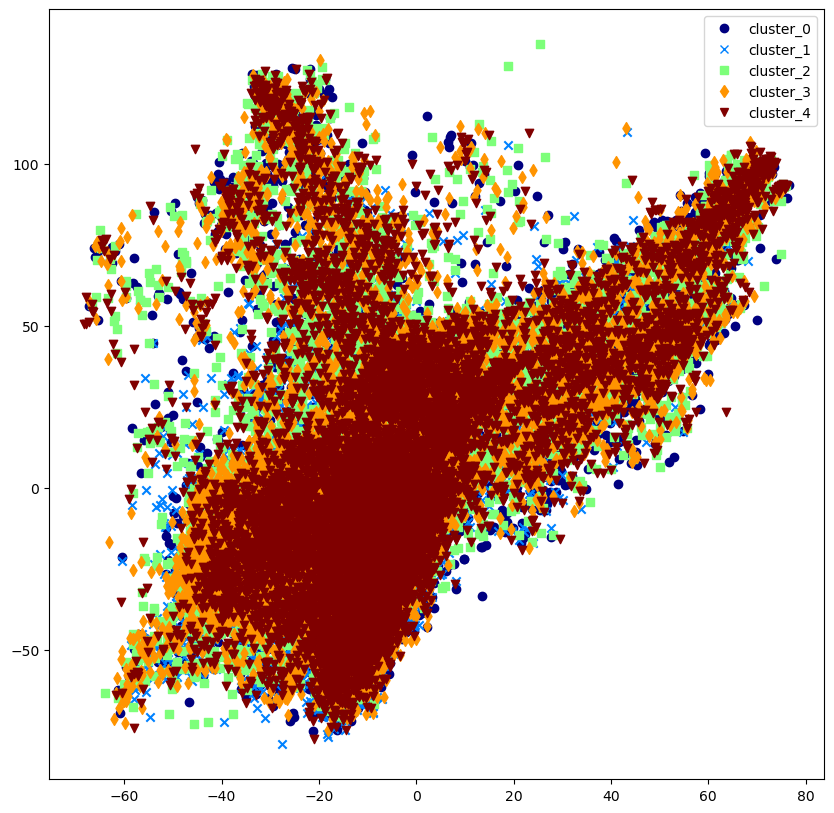

In [183]:
# cluster with logistic PCA
W = logistic_pca(c_array, num_components=2)[0]

# project
Z = c_array.dot(W)    

# visualise
scatter_plot(Z, ix_color, dff_labels)

In [ ]:
def vizualiza_T_SNE(df,names):
    #mfp = []
    #mfp = [[df['mfp'][x]] for x in range(len(df))]
    #print(mfp)
    #print(mfp.shape)
    #pca = PCA(n_components=50)
    #pca.fit(mfp)
    #pca_ = pca.transform(dist_mat)
    #print(pca_.shape)
    #sparse_mat = distance.pdist(list(df["mfp"]),metric="jaccard")
    #dist_mat = distance.squareform(sparse_mat)
    #print(dist_mat.shape)
    #clf = manifold.TSNE(n_components=2, metric="precomputed")
    #X_tsne = clf.fit_transform(pca_)
    #df = df.join(pd.DataFrame(X_tsne, columns=["tsne_x_after_PCA", "tsne_y_after_PCA"]))
    #mfp_un = [AllChem.GetMorganFingerprintAsBitVect\
    #          (Chem.MolFromSmiles(x), 3, nBits = 2048) for x in df['scaffold']]

    a = []
    print("Convert_")

    for x in range(len(df)):
        try:
            a.append(AllChem.GetMorganFingerprintAsBitVect\
                  (Chem.MolFromSmiles(df.loc[x]['scaffold']), 3, nBits = 2048))
        except:
            print("Faild to create scaffold_csk")
            print("Index",x)
            print(df.loc[x]['scaffold'])
    mfp_un = a
    
    pca = PCA(n_components=50)
    pca.fit(mfp_un)
    pca_ = pca.transform(mfp_un)
    print(np.shape(mfp_un))
    print(pca_.shape)
    simmat_un = GetTanimotoSimMat(mfp_un)
    sparse_mat = distance.pdist(pca_,metric="jaccard")
    #dist_mat = distance.squareform(simmat_un)
    dist_mat_ = distance.squareform(sparse_mat)
    print(simmat_un)
    print(sparse_mat)
    #print(dist_mat.shape)
    print(dist_mat_.shape)
    clf = manifold.TSNE(n_components=2, metric="precomputed")
    X_tsne = clf.fit_transform(dist_mat_)
    df = df.join(pd.DataFrame(X_tsne, columns=["tsne_x", "tsne_y"]))
    fig, ax = pyplot.subplots(figsize=(15,10))
    p=seaborn.scatterplot(x="tsne_x",
                      y="tsne_y",
                      data=df,
                      hue="cluster",
                      legend="brief",
                      ax=ax,
                      alpha=1
                     ).set(title=f't-SNE pro {names} ')
    
   


In [ ]:
vizualiza_T_SNE(df, "diverzitu vygenerovanych sloucenin(scaffoldu)")

Convert_
Faild to create scaffold_csk
Index 2481724
nan
Faild to create scaffold_csk
Index 2481725
nan
Faild to create scaffold_csk
Index 2481726
nan
Faild to create scaffold_csk
Index 2481727
nan
Faild to create scaffold_csk
Index 2481728
nan
Faild to create scaffold_csk
Index 2481729
nan
Faild to create scaffold_csk
Index 2481730
nan
Faild to create scaffold_csk
Index 2481731
nan
Faild to create scaffold_csk
Index 2481732
nan
Faild to create scaffold_csk
Index 2481733
nan
Faild to create scaffold_csk
Index 2481734
nan
Faild to create scaffold_csk
Index 2481735
nan
Faild to create scaffold_csk
Index 2481736
nan
Faild to create scaffold_csk
Index 2481737
nan
Faild to create scaffold_csk
Index 2481738
nan
Faild to create scaffold_csk
Index 2481739
nan
Faild to create scaffold_csk
Index 2481740
nan
Faild to create scaffold_csk
Index 2481741
nan
Faild to create scaffold_csk
Index 2481742
nan
Faild to create scaffold_csk
Index 2481743
nan
Faild to create scaffold_csk
Index 2481744
nan
Fail

In [243]:
def avarage_value(number, type_cluster, scaffold_type, generator, receptor, save_option):
    viz = visualization.Visualization(type_cluster, scaffold_type, generator, receptor, save_option)
    path = f"data/results/{receptor}/{scaffold_type}_scaffolds/{type_cluster}/{generator}/"
    link = {}
    for x in range(number):
        link[f'link_{x}'] = f'{path}metrics_cluster_{x}_{type_cluster}_{generator}.csv'

    df = pd.DataFrame()
    for x,y in link.items():
        a = pd.read_csv(y)
        df = pd.concat([df, a], ignore_index=True)
        
    display(df)
    a = df.mean(numeric_only=True)
    df.loc[len(df)] = [f"{generator}_mean", type_cluster, scaffold_type, a['uniq_scaffolds'], a['set_size'], '-',\
                       a['TUPOR'], a['SESY'], a['ASER'], a['tRS']]
    df = df.round(7)
    dff = df.copy()
    dff['set_size'] = dff['set_size'].apply(lambda x : "{:,}".format(x))
    dff['uniq_scaffolds'] = dff['uniq_scaffolds'].apply(lambda x : "{:,}".format(x))
    dff['tRS'] = dff['tRS'].apply(lambda x : "{:,}".format(x))

    mean = pd.DataFrame()
    mean = df.loc[5].to_frame().T
    display(dff)
                                        
    #mean.loc[0] = [name_mean, type_cluster, scaffold, a['uniq_scaffolds'], a['set_size'], '-',\
    #                   a['tpra'], '-', a['tprar'], a['sescy'], a['sescr'], a['sescry'], a['asescr'], a['tRS']]

    display(mean)
    dff.to_csv(f"data/results/{receptor}/{scaffold_type}_scaffolds/{type_cluster}/{generator}/df_all_clusters_with_mean_with_coma.csv", index = False)
    df.to_csv(f"data/results/{receptor}/{scaffold_type}_scaffolds/{type_cluster}/{generator}/df_all_clusters_with_mean.csv", index = False)
    dff.to_html(f"data/results/{receptor}/{scaffold_type}_scaffolds/{type_cluster}/{generator}/df_all_clusters_with_mean.html", index = False)
    mean.to_csv(f"data/results/{receptor}/{scaffold_type}_scaffolds/{type_cluster}/{generator}_mean_{scaffold_type}_{type_cluster}.csv", index=False) #float_format='%.7f'

In [244]:
type_cluster = 'dis' #options: 'dis'|'sim' 
number = 5 #options: 0-4 
scaffold_type = 'csk' #options: 'csk'|'murcko'
generator = 'Molpher' #options: 'Molpher'|'DrugEx'
receptor = 'Glucocorticoid_receptor' #options: 'Glucocorticoid_receptor'|'Leukocyte_elastase'


In [245]:

avarage_value(number, type_cluster, scaffold_type, generator, receptor, False)

,name,type_cluster,scaffold,uniq_scaffolds,set_size,TUPOR_,TUPOR,SESY,ASER,tRS
0,Molpher_0,dis,csk,135545,1187859,16/42,0.380952,0.114109,0.003387,4023
1,Molpher_1,dis,csk,132077,1211203,18/36,0.500000,0.109046,0.001329,1610
2,Molpher_2,dis,csk,137303,1178785,12/42,0.285714,0.116478,0.000233,275
3,Molpher_3,dis,csk,116723,891650,23/40,0.575000,0.130907,0.007706,6871
4,Molpher_4,dis,csk,106618,707678,38/46,0.826087,0.150659,0.010718,7585


,name,type_cluster,scaffold,uniq_scaffolds,set_size,TUPOR_,TUPOR,SESY,ASER,tRS
0,Molpher_0,dis,csk,"135,545.0","1,187,859.0",16/42,0.380952,0.114109,0.003387,"4,023.0"
1,Molpher_1,dis,csk,"132,077.0","1,211,203.0",18/36,0.500000,0.109046,0.001329,"1,610.0"
2,Molpher_2,dis,csk,"137,303.0","1,178,785.0",12/42,0.285714,0.116478,0.000233,275.0
3,Molpher_3,dis,csk,"116,723.0","891,650.0",23/40,0.575000,0.130907,0.007706,"6,871.0"
4,Molpher_4,dis,csk,"106,618.0","707,678.0",38/46,0.826087,0.150659,0.010718,"7,585.0"
5,Molpher_mean,dis,csk,"125,653.2","1,035,435.0",-,0.513551,0.124240,0.004675,"4,072.8"


,name,type_cluster,scaffold,uniq_scaffolds,set_size,TUPOR_,TUPOR,SESY,ASER,tRS
5,Molpher_mean,dis,csk,125653.2,1035435.0,-,0.513551,0.12424,0.004675,4072.8
